# Exploring Control

## Preliminaries

In [3]:
import control as c
from symmathSBML.symmath_sbml import SymmathSBML
import symmathSBML.constants as cn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as s
import tellurium as te

import os

In [2]:
PATH = os.path.join(os.getcwd(), "BIOMD56.ant")
if False:
    with open(PATH, "r") as fd:
        lines = fd.readlines()
    lines
else:
    SYMMATH = SymmathSBML(PATH)

In [3]:
symmath = SYMMATH.copy()

## Antimony Model

In [4]:
print(symmath.antimony)

// Created by libAntimony v2.12.0
function BB_218(A1, A2, A3, A4)
  (A2 - A1) + A3*A2 + A4*A1;
end

BB_218 is "BB"

function GK_219(A1, A2, A3, A4)
  2*A4*A1/((A2 - A1) + A3*A2 + A4*A1 + sqrt(((A2 - A1) + A3*A2 + A4*A1)^2 - 4*(A2 - A1)*A4*A1));
end

GK_219 is "GK"

function MichaelisMenten_220(M1, J1, k1, S1)
  k1*S1*M1/(J1 + S1);
end

MichaelisMenten_220 is "Michaelis-Menten"

function Mass_Action_2_221(k1, S1, S2)
  k1*S1*S2;
end

Mass_Action_2_221 is "Mass_Action_2"

function Mass_Action_1_222(k1, S1)
  k1*S1;
end

Mass_Action_1_222 is "Mass_Action_1"


model *BIOMD0000000056()

  // Compartments and Species:
  compartment cell;
  substanceOnly species $BCK2 in cell, MASS in cell, BUB2 in cell, BUD in cell;
  substanceOnly species C2 in cell, C2P in cell, C5 in cell, C5P in cell;
  substanceOnly species CDC14 in cell, $CDC14T in cell, RENT in cell, RENTP in cell;
  substanceOnly species CDC15 in cell, $CDC15i in cell, CDC20 in cell, CDC20i in cell;
  substanceOnly species CDC6 in ce

## System properties of Model

In [5]:
SYMMATH.state_svec

Matrix([
[  BCK2],
[  MASS],
[  BUB2],
[   BUD],
[    C2],
[   C2P],
[    C5],
[   C5P],
[ CDC14],
[CDC14T],
[  RENT],
[ RENTP],
[ CDC15],
[CDC15i],
[ CDC20],
[CDC20i],
[  CDC6],
[ CDC6P],
[ CDC6T],
[    F2],
[    F5],
[   F2P],
[   F5P],
[  CDH1],
[ CDH1i],
[  CKIT],
[ SIC1T],
[  CLB2],
[ CLB2T],
[  CLB5],
[ CLB5T],
[  CLN2],
[  CLN3],
[  ESP1],
[    IE],
[   IEP],
[  LTE1],
[  MAD2],
[  MCM1]])

In [6]:
SYMMATH.substitute(dct=SYMMATH._getParameterSymbolDct(), expression=SYMMATH.state_epr_jacobian_smat)

Matrix([
[0, 0.00770163533955495,                            0,     0,                  0,        0,                  0,           0,                             0, 0,                0,         0,    0,           0,               0,              0,                                          0,         0, 0,                 0,                  0,        0,           0,                                                                                                                                                                                                                                                                                                                               0,                                                                                                                                                                                                                                                                                                   0, 0, 0,            

## Control Analysis

In [7]:
# Construct the elements of a system
# Construct the elements of a system
sys = symmath.mkStateSpace()
X0 = symmath.mkInitialState()

In [8]:
times = [0.1 * n for n in range(10)]
T, yout = c.impulse_response(sys, times, X0)

In [9]:
yout[3][0]

array([ 0.008473  ,  0.01309614,  0.02032101,  0.03068543,  0.0428206 ,
        0.05226594,  0.04973598,  0.01859032, -0.0688562 , -0.25671158])

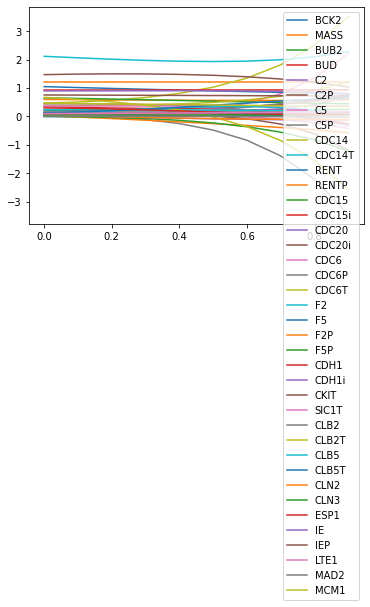

In [11]:
num_species = len(X0)
times = [0.1*n for n in range(10)]
_, ax = plt.subplots(1)
T, yout = c.impulse_response(sys, times, X0)
for idx in range(num_species):
    ax.plot(T, yout[idx][0])
plt.legend(symmath.species_names)

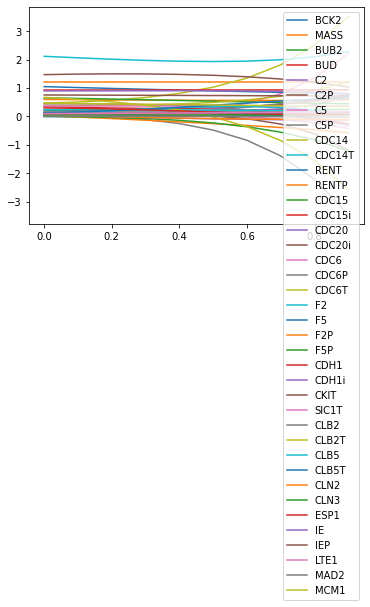

In [11]:
num_species = len(X0)
times = [0.1*n for n in range(10)]
_, ax = plt.subplots(1)
T, yout = c.impulse_response(sys, times, X0)
for idx in range(num_species):
    ax.plot(T, yout[idx][0])
plt.legend(symmath.species_names)

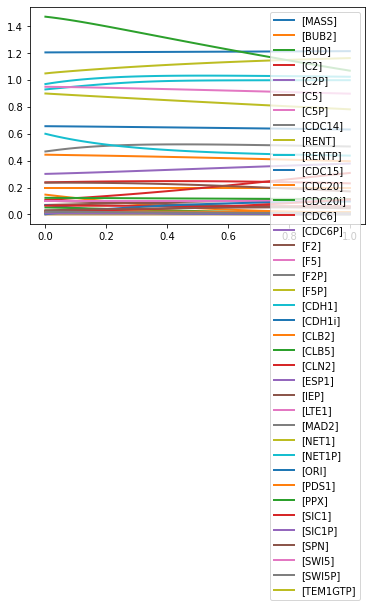

In [12]:
symmath.roadrunner.reset()
data = symmath.roadrunner.simulate(0, 1)
symmath.roadrunner.plot(data)

## Issues
1. Many models wouldn't load in symmathSBML
1. Seems that state includes some elements that are not species, BCK2
1. Why is there a difference between the length of the state_vec and the length of species_names?
1. Need getCurrentState

In [13]:
len(symmath.species_names)

54

In [14]:
len(symmath.state_svec)

39